# Machine Learning - Classification
## Term Project
### Rhichard Koh & Mohsin Mohammed


<h2>1. Preparing the problem:</h2>
<h4> Import the dependencies:</h4>

In [1]:
# lets import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

<h4> Load Dataset:</h4>

In [2]:
SEED = 7
df = pd.read_csv('https://raw.githubusercontent.com/ROCCYK/MachineLearning-Classification/main/FinalProject/heartdataset.csv')

# printing the first 10 rows of our dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


It looks like all the features provided are in numerical form. However, a quick look at the description of the reveals that the attributes named 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' are categorical in nature but have been encoded in the dataset so we will use one hot encoding or get dummies to encode them to avoid treating them as ordinal type. 

Lets also do an analysis of the entries in our data frame to find out the number of rows and columns and the different data types

<h2>2. Summarize Data / Exploratory Data Analysis:</h2>
<h4> Descriptive Statistics:</h4>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We have a total of 303 records (rows) and 14 columns with all belonging to the integer datatype except for the old peak which belongs to the float category type.

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


A statistical analysis reveals that the maximum age is 77 and 75% of the population in the dataset is 61 or younger while 50% of the population is 55 or younger and the minimum age is 29. 

<h4> Data Visualizations:</h4>

Checking for target class imbalance

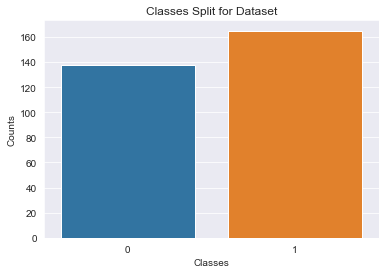

In [5]:
sns.countplot(data=df,x='target').set(title='Classes Split for Dataset', xlabel='Classes',ylabel='Counts')
plt.show()

Our target class is imbalanced so we have to use either downsampling, upsampling or SMOTE to take care of this imbalance.

Lets the plot the age distribution of our data set to understand the demographic and confirm that with our statistical description.

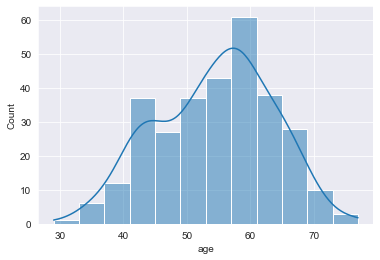

In [6]:
sns.set_style('darkgrid')
sns.histplot(data=df, x='age', kde=True)
plt.show()

We can see that the age column is more or less uniformly distributed but we can always make the case that it is bimodal 

Lets see if men and women are equally represented in the dataset:

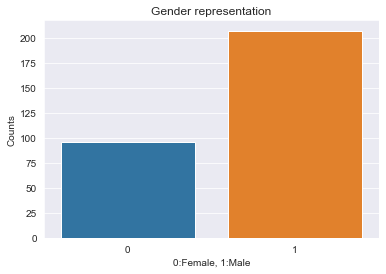

In [7]:
sns.countplot(data=df, x='sex').set(title='Gender representation', xlabel='0:Female, 1:Male',ylabel='Counts')
plt.show()

In [8]:
# Checking the percentage of our gender distribution:
female_representation = (len(df[df.sex==0]) / (len(df.sex)) * 100)
male_representation = (len(df[df.sex==1]) / (len(df.sex)) * 100)

print(f"The males represent {round(male_representation, 2)}% of the population in the dataset")
print(f"The females represent {round(female_representation, 2)}% of the population in the dataset")

The males represent 68.32% of the population in the dataset
The females represent 31.68% of the population in the dataset


We can see that our sample consists of more male population than females. 

In [9]:
comparison = pd.crosstab(df.age, df.target)
comparison.head()

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2


Let's plot this data to visualize the number of times the population had a heart disease based on their age.

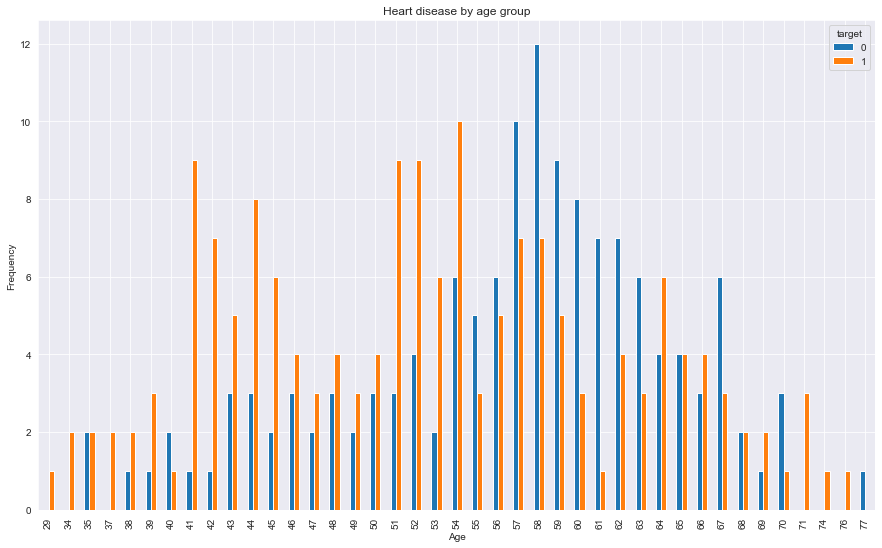

In [10]:
comparison.plot(kind='bar', figsize=(15, 9))
plt.title('Heart disease by age group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see that people that are ages 54 had the most number of heart diseases. People belonging to the age group of 41, 51 and 52 have the same frequency in terms of heart disease. We can also see that the highest number of people that did not have a heart diseaase are aged 58.

Lets check the correlation of all our features:

In [11]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

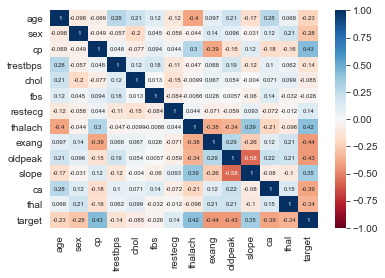

In [12]:
# lets create a heatmap to visualize this data:
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':6})

We are using a heatmap to understand the correlation between the features and the target variable. We ae using a a color map of blue to red with the color blue indicating a postive correlation and red indicating a negative correlation. 

We can see that the target is positively correlated with the features thalach albeit a not so strong correlation because the values are not close to 1. 

We can see a strong negative correlaton between slope and oldpeak. The target variable is also negatively correlated with the features oldpeak and exang.

The diagnol line just represents the correlation for the variable with itself which is why it shows as 1. 

<h2>2. Prepare Data: </h2>
<h4> Data Cleaning: </h4>

Checking for any missing values:

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We do not have any missing values so we can continue with other exploratory analysis

Checking for duplicates

In [14]:
df.duplicated().sum()

1

Dropping duplicates

In [15]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [16]:
df_dummies = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df_dummies

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


<h4>Data Transformations</h4>

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_dummies_scaled = sc.fit_transform(df_dummies[['age','trestbps', 'chol','thalach', 'oldpeak']])
df_dummies_scaled

array([[ 0.94979429,  0.76406571, -0.26128493,  0.01882584,  1.08402203],
       [-1.92854796, -0.09140084,  0.06774054,  1.63697881,  2.11892611],
       [-1.48572607, -0.09140084, -0.82256367,  0.98097085,  0.30784398],
       ...,
       [ 1.50332164,  0.70703461, -1.0354625 , -0.37477894,  2.0326841 ],
       [ 0.28556146, -0.09140084, -2.23543773, -1.51185941,  0.13535997],
       [ 0.28556146, -0.09140084, -0.20322161,  1.06843858, -0.8995441 ]])

In [18]:
df_dummies_scaled = pd.DataFrame(df_dummies_scaled, columns=['age','trestbps', 'chol','thalach', 'oldpeak'])
df_dummies_scaled

,age,trestbps,chol,thalach,oldpeak
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360
299,1.503322,0.707035,-1.035462,-0.374779,2.032684
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360


In [19]:
df_dummies = df_dummies.drop(columns=['age','trestbps', 'chol','thalach', 'oldpeak'])
df_dummies

,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0,1,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,1,1,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [20]:
df_dummies_scaled = pd.concat([df_dummies_scaled.reset_index(drop=True),df_dummies.reset_index(drop=True)], axis=1)
df_dummies_scaled

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,1.503322,0.707035,-1.035462,-0.374779,2.032684,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


<h4> Balancing the target class</h4>

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)

X_resample,y_resample = smote.fit_resample(df_dummies_scaled.drop(columns=['target']),df_dummies_scaled['target'])
df_resample = pd.concat([pd.DataFrame(y_resample), pd.DataFrame(X_resample)], axis=1)

C:\Users\xxryk\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


0    164
1    164
Name: target, dtype: int64

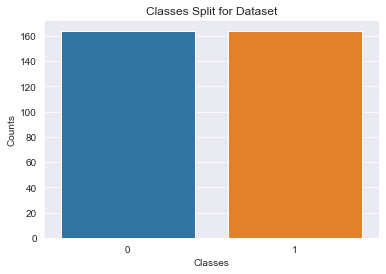

In [22]:
sns.countplot(data=df_resample, x='target').set(title='Classes Split for Dataset', xlabel='Classes',ylabel='Counts')
df_resample.target.value_counts()

In [23]:
x = df_resample.drop(columns=['target'])
target_label = df_resample['target']

<h2>Model Building and Evaluate Algorithms:</h2>
<h4>Split-out validation dataset</h4>

In [24]:
# dividing the dataset into train, test, validate with 0.6, 0.2, 0.2
X, X_test, y, y_test = train_test_split(x,target_label,test_size=0.2,train_size=0.8, random_state=SEED)
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=SEED)

In [25]:
X_train.shape, X_test.shape, X_validate.shape

((196, 30), (66, 30), (66, 30))

In [26]:
y_train.shape, y_test.shape, y_validate.shape

((196,), (66,), (66,))

<h4>Model 1: RandomForest</h4>

In [27]:
rnd_clf = RandomForestClassifier(random_state=SEED)  # n_estimators is the number of trees (rf optimized for decision trees)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)


<h4>Spot checking the Random Forest Classifier:</h4>

In [28]:
rf_accuracy_score = accuracy_score(y_test, y_pred_rf)
rf_accuracy_score

0.8484848484848485

<h4>Model 2: KNN</h4>

In [29]:
# Lets train a KNearestneighbors algorithm:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# Spotcheck the algorithm:

knn_acc_score = accuracy_score(y_test, y_pred_knn)
knn_acc_score

0.803030303030303

<h4> Model 3: SVC </h4>

In [30]:
svc_clf = SVC(random_state=SEED)

svc_clf.fit(X_train, y_train)

y_pred_svc = svc_clf.predict(X_test)

# Spotcheck the algorithm:

svc_acc_score = accuracy_score(y_test, y_pred_svc)
svc_acc_score

0.8484848484848485

<h4>Model 4: Voting ensemble<h4>

In [31]:
voting_clf = VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=200, random_state=SEED)),
                                         ('lr', LogisticRegression(penalty='l2', random_state=SEED)),
                                         ('ada', AdaBoostClassifier())])

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=200,
                                                     random_state=7)),
                             ('lr', LogisticRegression(random_state=7)),
                             ('ada', AdaBoostClassifier())])

In [32]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

dt = 0.7424242424242424
lr = 0.803030303030303
ada = 0.7878787878787878


<h4>Model 5: Neural Network</h4>

In [33]:
# Finding out the input layer dimensions:
n_features = X_train.shape[1]
n_features

30

In [34]:
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 0.6325 - accuracy: 0.5153
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.5306
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.6122
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.7296
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5364 - accuracy: 0.7449
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.7857
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.8214
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8316
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8469
Epoch 10/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8520
Epoch 11/

In [35]:
# spotchecking the neural network:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

3/3 [==============================] - 0s 2ms/step - loss: 1.3918 - accuracy: 0.8485


(1.3917896747589111, 0.8484848737716675)

<h4>Optimizing the models: </h4>

In [36]:
# optimizing the neural network:
model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=30, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/200
13/13 [==============================] - 1s 14ms/step - loss: 2.6312 - accuracy: 0.5102 - val_loss: 2.5117 - val_accuracy: 0.6212
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 2.4470 - accuracy: 0.5561 - val_loss: 2.3411 - val_accuracy: 0.7121
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 2.3012 - accuracy: 0.6071 - val_loss: 2.1830 - val_accuracy: 0.7273
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 2.1732 - accuracy: 0.6173 - val_loss: 2.0414 - val_accuracy: 0.7121
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 2.0274 - accuracy: 0.6531 - val_loss: 1.9185 - val_accuracy: 0.7273
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 1.8840 - accuracy: 0.7041 - val_loss: 1.7974 - val_accuracy: 0.7727
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 1.7897 - accuracy: 0.7347 - val_loss: 1.6829 - val_accuracy: 0.7576
Epoch 8/200


In [37]:
# Evaluating the improved neural network:
loss, accuracy = model.evaluate(X_validate, y_validate)
loss, accuracy

3/3 [==============================] - 0s 2ms/step - loss: 0.8350 - accuracy: 0.8182


(0.83504718542099, 0.8181818127632141)

We can see that by adding a Dropout layer to the model, we can reduce overfitting and improve the model's ability to generalize to new data. We noticed that the model's accuray score went up and the loss also reduced significantly compared to the previous model.

<h4>Optimizing the random forest model</h4>

In [38]:
# optimizing the Random Forest model:

param_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],
              'n_estimators': [200, 300, 400, 500, 600],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes':[100, 200, 300, 400, 500],
              'criterion': ['gini', 'entropy']}

new_rdm_clf = RandomizedSearchCV(RandomForestClassifier(random_state=SEED), param_grid, scoring='accuracy', cv=3)

new_rdm_clf.fit(X_train, y_train)

print(new_rdm_clf.best_params_)

{'n_estimators': 500, 'min_samples_split': 10, 'max_leaf_nodes': 300, 'max_depth': 40, 'criterion': 'gini'}


In [39]:
y_pred_rdm_clf = new_rdm_clf.predict(X_test)

accuracy_score(y_test, y_pred_rdm_clf)

0.8181818181818182

We are using a randomized search which randomly picks a few hyperparameters from a range and returns them. We see an improvement compared to the previous model with no hyperparameter tuning. We can also use an exhaustive hyperparameter search by using the GridSearchCV:

In [40]:
# grid_rdm_clf = GridSearchCV(RandomForestClassifier(random_state=SEED), param_grid, scoring='accuracy', cv=3)

# grid_rdm_clf.fit(X_train, y_train)

# print(grid_rdm_clf.best_params_)

This is computationally expensive and can take a lot of time. so we will contibue with the RandomizedSearchCV as it solves the drawback of GridSearchCV. 

<h4>Optimizing the knn model</h4>

In [41]:
# optimizing the Knn model:

param_grid_knn = {'n_neighbors': [4, 8, 12, 16, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

new_knn_clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=3)

new_knn_clf.fit(X_train, y_train)

print(new_knn_clf.best_params_)

{'weights': 'uniform', 'n_neighbors': 4, 'algorithm': 'ball_tree'}


In [42]:
y_pred_knn_clf = new_knn_clf.predict(X_test)

knn_accuracy_score = accuracy_score(y_test, y_pred_knn_clf)

print(f"The accuracy score of Kneighbors Classifier is {knn_accuracy_score}")

The accuracy score of Kneighbors Classifier is 0.8333333333333334


<h4>Optimizing the SVC model</h4>

In [43]:
# optimizing the Knn model:

param_grid_svc = {'C': [0.5, 0.8, 1, 1.5, 2, 3],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

new_svc_clf = RandomizedSearchCV(SVC(), param_grid_svc, scoring='accuracy', cv=3)

new_svc_clf.fit(X_train, y_train)

print(new_svc_clf.best_params_)

{'kernel': 'rbf', 'C': 1}


In [44]:
y_pred_svc_clf = new_svc_clf.predict(X_test)

svc_accuracy_score = accuracy_score(y_test, y_pred_svc_clf)

print(f"The accuracy score of svc Classifier is {svc_accuracy_score}")

The accuracy score of svc Classifier is 0.8484848484848485


<h2>Finalize Models:</h2>
<h4>Predictions on validation dataset</h4>

In [45]:
# Random forest
y_pred_rdm_val = new_rdm_clf.predict(X_validate)

rdm_accuracy = accuracy_score(y_validate, y_pred_rdm_val)
print(f"The accuracy score of the random forest classifier on the validate set is: {rdm_accuracy}")

The accuracy score of the random forest classifier on the validate set is: 0.803030303030303


In [46]:
# knn
y_pred_knn_val = new_knn_clf.predict(X_validate)

knn_accuracy = accuracy_score(y_validate, y_pred_knn_val)


print(f"The accuracy score of the knn classifier on the validate set is: {knn_accuracy}")

The accuracy score of the knn classifier on the validate set is: 0.7727272727272727


In [47]:
# svc
y_pred_svc_val = new_svc_clf.predict(X_validate)

svc_accuracy_score_val = accuracy_score(y_validate, y_pred_svc_val)

print(f"The accuracy score of svc Classifier on the validate set is: {svc_accuracy_score_val}")

The accuracy score of svc Classifier on the validate set is: 0.8333333333333334


In [48]:
# voting classifier
y_pred_voting = voting_clf.predict(X_validate)
voting_accuracy_score = accuracy_score(y_validate, y_pred_voting)
print(f"The accuracy score of the voting classifier on the validate set is: {voting_accuracy_score}")

The accuracy score of the voting classifier on the validate set is: 0.803030303030303


In [49]:
# neural network

y_pred_nn = model.predict(X_validate)

y_pred_nn

binary_predictions_nn = [1 if x > 0.5 else 0 for x in y_pred_nn]

nn_accuracy = accuracy_score(y_validate, binary_predictions_nn)



3/3 [==============================] - 0s 2ms/step


In [50]:
print(f"The accuracy score of the neural network classifier on the validate set is: {nn_accuracy}")

The accuracy score of the neural network classifier on the validate set is: 0.8181818181818182


10. What will you do if the dataset was unlabeled. Assuming that the dataset
is unlabeled, perform an unsupervised model building. Explain your findings.

If the dataset was unlabeled, we would perform an unsupervised learning algorithm such as clustering to cluster the dataset and find which cluster the dataset belongs to. After labeling the dataset we can perform our normal supervised learning algorithms on the labeled dataset.

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
X_labels = kmeans.fit_predict(X)

C:\Users\xxryk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xxryk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [73]:
X_labels

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [74]:
y

291    0
129    1
273    0
70     1
244    0
      ..
211    0
67     1
25     1
196    0
175    0
Name: target, Length: 262, dtype: int64

In [75]:
accuracy_score(X_labels,y)

0.7748091603053435

We can observe that it is not as accurate as a supervised model, therefore after we label the dataset and fit it into the supervised model it would result in being less accurate.